<a href="https://colab.research.google.com/github/yoooniverse/NLP/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary classification 중 대표적 알고리즘 : logistic regression

출력이 0과 1사이의 값을 가지면서 S자 형태로 그려지는 함수 : 시그모이드 함수(Sigmoid function)

왜 y = wx + b 함수 안됨? (1) 직선 표현 함수라서 (2) y값이 음의 무한대 ~ 양의 무한대까지 나올 수 있으므로

sigmoid 함수 : 𝜎

logistic regression을 풀기 위한 가설

$H(x) = \frac{1}{1+e^{-(wx+b)}} = sigmoid(wx+b) = \sigma (wx+b)$

goal : get proper w and b


In [1]:
import numpy as np
import matplotlib.pyplot as plt

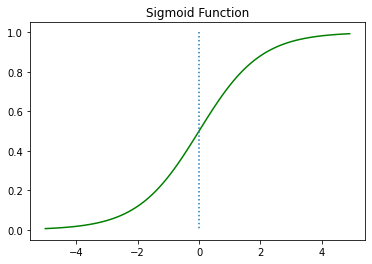

In [4]:
def sigmoid(x) : 
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

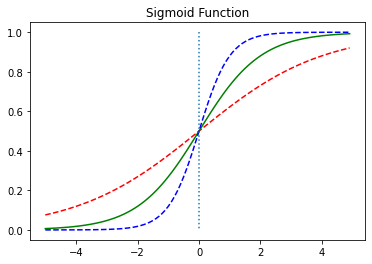

In [6]:
#w의 값이 변화하는 경우
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

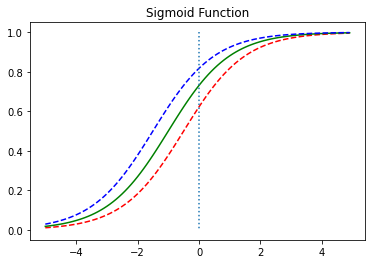

In [7]:
#b의 값이 변화하는 경우
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

logistic regression에서 사용하는 cost function : mse 안씀

왜 mse 안씀? "optimizer인 경사 하강법을 사용하였을때 찾고자 하는 최소값이 아닌 잘못된 최소값에 빠질 가능성이 매우 높습니다"

로지스틱 회귀라는 문제에서 가중치 $w$를 최소로 만드는 적절한 새로운 비용 함수를 찾아야 합니다

찾아야 하는 함수를 목적 함수라고 하자

$J$는 목적 함수(objective function)을 의미

J(w)의 기본 틀

$J(w) = \frac{1}{n}\sum_{i = 1}^{n}f\left (H(x^{(i)}), y^{(i)}\right)$

함수 $f$를 정의 : 목적 함수 J가 전체 데이터에 대해 함수 f의 값의 평균을 계산하고 있는 상태

적절한 가중치 = 실제값과 예측값에 대한 오차를 줄인 값 => f는 cost function

$J(w) = \frac{1}{n}\sum_{i = 1}^{n}cost\left (H(x^{(i)}), y^{(i)}\right)$

$cost(H(x), y) = -[ylogH(x) + (1-y)log(1-H(x))] $

$J(w) = -\frac{1}{n}\sum_{i = 1}^{n}[y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$

logistic regression에서 찾아낸 cost 함수 : **CROSS ENTROPY 함수**

정리) 
logistic regression의 cost function : Cross entropy function
가중치를 찾기 위해 : cross entropy 함수의 평균을 취한 함수를 사용



---


logistic regression with keras api

scenario: 독립 변수 데이터를 x, 숫자 10 이상인 경우에는 1, 미만인 경우에는 0을 부여한 레이블 데이터를 y

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.25)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 519ms/step - loss: 39.7314 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 1.6554 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 1.6152 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 1.5749 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 1.5347 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 1.4945 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 1.4544 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 1.4143 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 1.3742 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 5ms/st

1/1 [==============================] - 0s 36ms/step


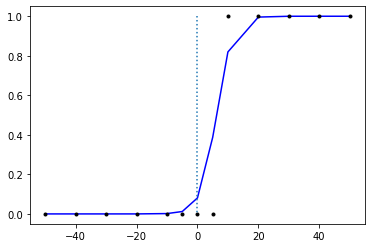

In [17]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')
plt.plot([0,0], [1.0, 0.0], ':')

In [18]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

1/1 [==============================] - 0s 44ms/step
[[0.11554645]
 [0.1623175 ]
 [0.22324203]
 [0.2988752 ]
 [0.34173918]]
1/1 [==============================] - 0s 28ms/step
[[0.8706624 ]
 [0.9971254 ]
 [0.99994403]
 [0.9999989 ]
 [1.        ]]
